### Project Title - Replace existing Sasol & other HP with  T36 HP and maintain all process and quality standard

### Problem satement 

In [1]:
#!pip install category_encoders 
#!pip install openpyxl

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
# Reading data collection file 

df = pd.read_excel(r'T36HP1.xlsx')
df.shape

(215, 31)

In [5]:
# checking what kind of value in the dataset
pd.set_option('display.max_columns', None)
df.head()

,Date,Product,Ext Torque,Ext output,Chill roll temp,Bath temp,Ext vacuum,Line Speed,GV,MD TENSILE STRENGTH,TD TENSILE STRENGTH,MD ELONGATION,TD ELONGATION,MD MODULUS OF ELASTICITY,TD MODULUS OF ELASTICITY,Seal Initiation Temp,HEAT SEAL STRENGTH,Sasol HP RM,Melt Temp.,M.P Outlet Pr.,MD GAP 1,MD GAP 2,MD GAP 3,MD GAP 4,MD GAP 5,TD OS,TD DS,2sigma,T36 RM,RPG RM,TD Break
0,2021-06-15,SCL40-TI/A01,65.4,4371,28,28,150,240,1.92,1200,2690,170,29,17400,37000,107,356,50,249.7,35.3,1.02,1.13,4.13,1.06,0.99,35.0,31.3,2.302,30,20,1
1,2021-06-15,SCL40-TI/A01,72.2,4580,28,28,149,240,0.75,1420,1150,170,44,17300,27000,107,320,50,250.8,35.2,1.02,1.13,4.13,1.06,0.99,33.0,29.2,1.307,30,20,1
2,2021-06-15,SCL40-TI/A01,69.3,4594,28,28,145,248,1.79,1280,2950,220,50,13000,30700,106,366,50,249.7,36.6,1.02,1.13,4.13,1.06,0.99,32.3,28.2,1.310,30,20,0
3,2021-06-15,SCL40-TI/A01,68.7,4446,28,28,148,259,1.92,1310,2810,200,46,11800,30400,106,335,50,250.8,36.1,1.02,1.13,4.13,1.06,0.99,32.7,28.0,1.038,30,20,0
4,2021-06-15,SCL40-TI/A01,67.5,4626,28,28,150,264,1.70,1290,3060,230,58,13700,33300,106,354,50,250.8,34.7,1.02,1.13,4.13,1.06,0.99,33.2,28.9,0.917,30,20,0


In [6]:
#Checking distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ext Torque,215.0,71.426512,4.188156e+00,62.200,67.700,70.600,75.1000,81.200
Ext output,215.0,4247.483721,4.372041e+02,3398.000,4060.000,4163.000,4662.5000,4928.000
Chill roll temp,215.0,30.669767,3.198681e+00,26.000,28.000,30.000,34.0000,35.000
Bath temp,215.0,30.860465,3.245280e+00,26.000,27.000,30.000,34.0000,36.000
Ext vacuum,215.0,123.088372,2.327380e+01,100.000,101.000,105.000,148.0000,151.000
Line Speed,215.0,396.106977,8.348441e+01,240.000,341.000,447.000,470.0000,472.000
GV,215.0,2.898563,1.469811e+00,0.660,1.710,3.050,3.7700,9.170
MD TENSILE STRENGTH,215.0,1256.479070,1.019035e+02,838.000,1200.000,1260.000,1320.0000,1530.000
TD TENSILE STRENGTH,215.0,2952.674419,2.271212e+02,1150.000,2885.000,2980.000,3060.0000,3830.000
MD ELONGATION,215.0,198.418605,1.309502e+02,140.000,170.000,180.000,200.0000,1700.000


In [7]:
#Get 0 Standard Deviation fields. They are useless for our modeling
zero_std_cols = df.describe().T.iloc [  list(df.describe().T['std']<0.001) ].T.columns

print (zero_std_cols)

df.drop(columns=zero_std_cols, inplace=True)

Index(['MD GAP 1', 'MD GAP 4', 'MD GAP 5'], dtype='object')


In [8]:
df['TD Break'].value_counts()

0    188
1     27
Name: TD Break, dtype: int64

In [9]:
#Binarise TD Break field to 0 and 1

df['TD Break'] = df['TD Break'].apply(lambda x : 1 if x >= 1 else 0)

In [10]:
df['TD Break'].value_counts()

#Dataset is not balanced wrt to target variable. We have very less records for break.

0    188
1     27
Name: TD Break, dtype: int64

In [11]:
#Clean Column Name
cols=[]
for col in df.columns:
    cols.append(col.replace(' ',''))
df.columns=cols
print ('New Column Name :',cols)

New Column Name : ['Date', 'Product', 'ExtTorque', 'Extoutput', 'Chillrolltemp', 'Bathtemp', 'Extvacuum', 'LineSpeed', 'GV', 'MDTENSILESTRENGTH', 'TDTENSILESTRENGTH', 'MDELONGATION', 'TDELONGATION', 'MDMODULUSOFELASTICITY', 'TDMODULUSOFELASTICITY', 'SealInitiationTemp', 'HEATSEALSTRENGTH', 'SasolHPRM', 'MeltTemp.', 'M.POutletPr.', 'MDGAP2', 'MDGAP3', 'TDOS', 'TDDS', '2sigma', 'T36RM', 'RPGRM', 'TDBreak']


In [12]:
#Check what are the different products & their samples

products = df['Product'].value_counts()
products

#We don't have equal number of sample of each product. Not balanced

SCL20-TI/A01    74
SCL40-TI/A01    27
SZ18-TI/B01     26
SCL30-TI/A01    17
SAF30-TT/A11    14
SAF40-TT/A11    12
SCL18-TI/A01    11
SCL25-TI/A01     9
SAF35-TT/A11     8
SZ30-TI/A01      7
SCL40-TI/A04     6
SCL25-TI/T01     3
SZ30-TI/A01      1
Name: Product, dtype: int64

In [13]:
#list those columns which has more than 5 records
prods = list(products[products>5].index)
prods

['SCL20-TI/A01',
 'SCL40-TI/A01',
 'SZ18-TI/B01',
 'SCL30-TI/A01',
 'SAF30-TT/A11',
 'SAF40-TT/A11',
 'SCL18-TI/A01',
 'SCL25-TI/A01',
 'SAF35-TT/A11',
 'SZ30-TI/A01 ',
 'SCL40-TI/A04']

In [14]:
#keep only those records which has more than 5 records
df = df.loc[df['Product'].isin(prods)]  
df.shape 

#4 samples deleted. Earlier 215 samples

(211, 28)

In [15]:
products = df['Product'].value_counts()
products

#We don't have equal number of sample of each product. Not balanced

SCL20-TI/A01    74
SCL40-TI/A01    27
SZ18-TI/B01     26
SCL30-TI/A01    17
SAF30-TT/A11    14
SAF40-TT/A11    12
SCL18-TI/A01    11
SCL25-TI/A01     9
SAF35-TT/A11     8
SZ30-TI/A01      7
SCL40-TI/A04     6
Name: Product, dtype: int64

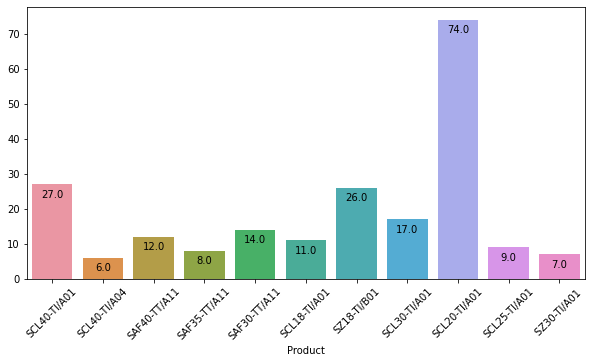

In [16]:
#Visualize number of samples for each product

import seaborn as sns
plt.figure(figsize=(10,5))
ax =sns.barplot(x='Product', y=df.index, estimator=len, data=df )
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, -10), 
               textcoords = 'offset points')

plt.show()

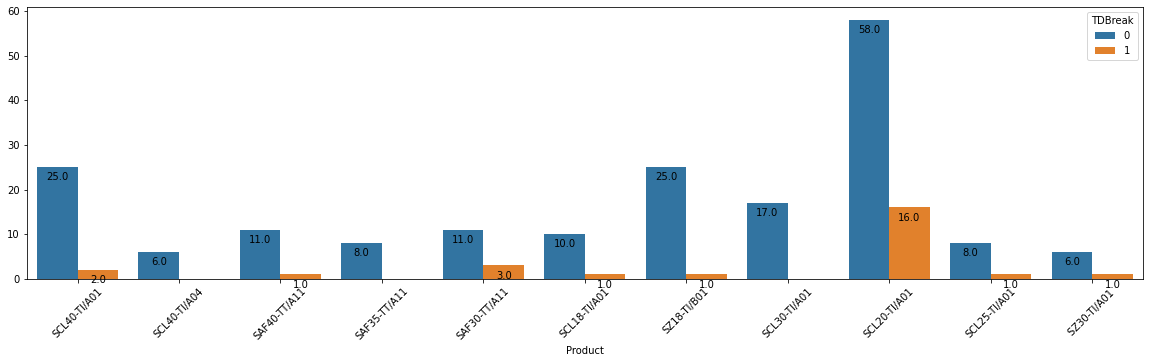

In [17]:
#Visualize TDBreak against each product
import seaborn as sns
plt.figure(figsize=(20,5))
ax =sns.barplot(x='Product', y=df.index,hue='TDBreak', estimator=len, data=df )
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, -10), 
               textcoords = 'offset points')

plt.show()

#In absolute number SCL20 has most of the failure. Secondly SAF30.

In [18]:
#df.groupby( ['Product','TDBreak'])['Product'].count()

In [19]:
#Analyse TDBreak of each product in percentage

df.groupby( ['Product','TDBreak'])['Product'].count() / df.groupby( ['Product'])['Product'].count()*100

#SCL20 21% failure, SCL25 11% failure,  #SCL20 21% failure, SCL25 11% failure, SZ30 14% failure

Product       TDBreak
SAF30-TT/A11  0           78.571429
              1           21.428571
SAF35-TT/A11  0          100.000000
SAF40-TT/A11  0           91.666667
              1            8.333333
SCL18-TI/A01  0           90.909091
              1            9.090909
SCL20-TI/A01  0           78.378378
              1           21.621622
SCL25-TI/A01  0           88.888889
              1           11.111111
SCL30-TI/A01  0          100.000000
SCL40-TI/A01  0           92.592593
              1            7.407407
SCL40-TI/A04  0          100.000000
SZ18-TI/B01   0           96.153846
              1            3.846154
SZ30-TI/A01   0           85.714286
              1           14.285714
Name: Product, dtype: float64

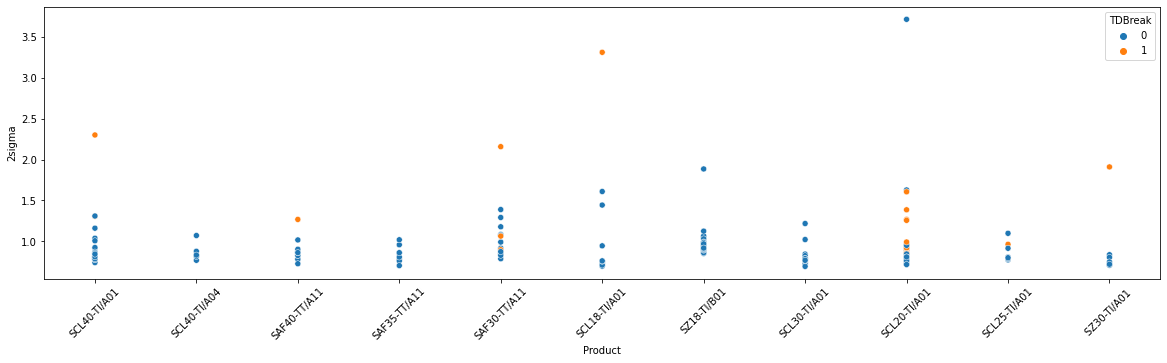

In [20]:
#Analyse Relationship between TDBreak and 2Sigma for Each product

import seaborn as sns
plt.figure(figsize=(20,5))
ax =sns.scatterplot(x='Product', y='2sigma',hue='TDBreak', data=df )
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, -10), 
               textcoords = 'offset points')

plt.show()

#Not able to visualize clearly anything.

In [21]:
#Analyse Relationship between TDBreak and 2Sigma for Each product

failure_rel_dict={}
for prod in prods:
    df1=df.loc[df.Product==prod]
    cor_for_prod = df1[['Product','2sigma','TDBreak']].corr()
    failure_rel_dict[prod] =cor_for_prod['2sigma']
    #print (prod,'\n', cor_for_prod,'\n')
    
    
df_failure_rel = pd.DataFrame(failure_rel_dict).T.sort_values('TDBreak', ascending=False)
df_failure_rel

#Break and 2sigma has highest positive correlation for SZ30, SCL18

,2sigma,TDBreak
SZ30-TI/A01,1.0,0.993715
SCL18-TI/A01,1.0,0.916778
SAF40-TT/A11,1.0,0.859440
SCL40-TI/A01,1.0,0.798598
SAF30-TT/A11,1.0,0.421195
SCL25-TI/A01,1.0,0.351319
SCL20-TI/A01,1.0,0.153945
SZ18-TI/B01,1.0,-0.027452
SCL30-TI/A01,1.0,NaN
SAF35-TT/A11,1.0,NaN


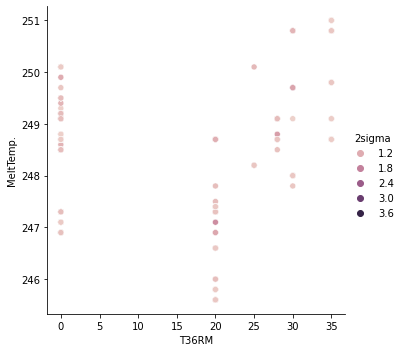

In [22]:
sns.relplot(data=df, x='T36RM', y='MeltTemp.', hue='2sigma')

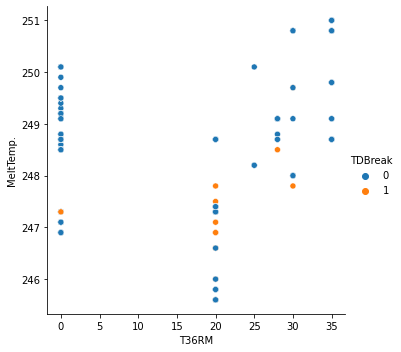

In [23]:
sns.relplot(data=df, x='T36RM', y='MeltTemp.', hue='TDBreak')

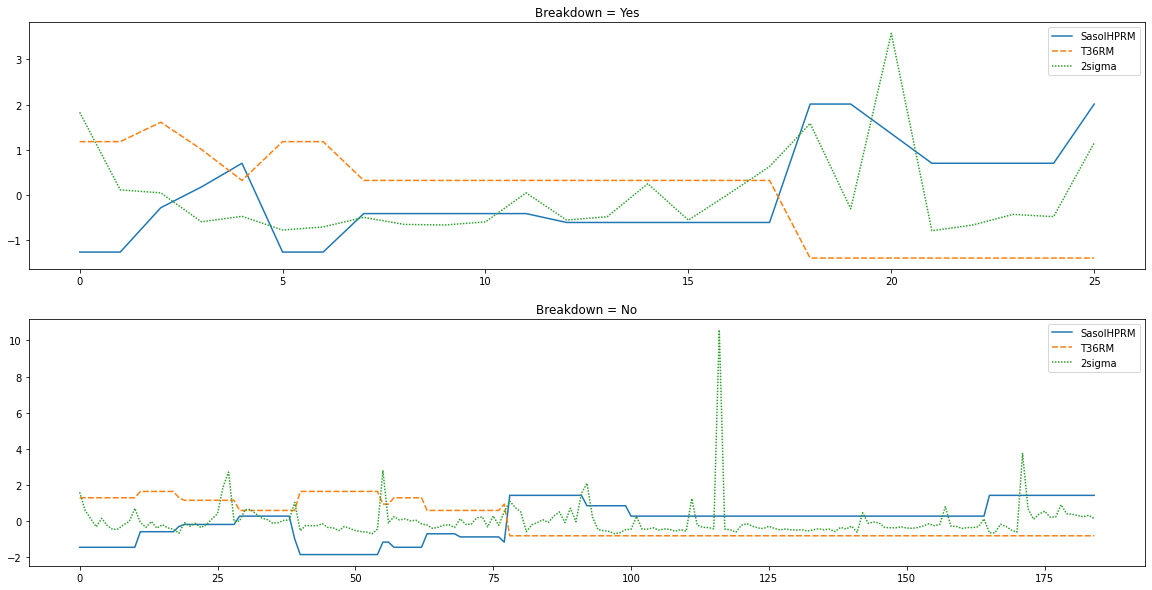

In [24]:
#Impact of Sasol, T36 on TDBreak and 2Sigma

df2_1 = df [['T36RM','SasolHPRM', '2sigma','TDBreak']][df['TDBreak']==1]
df2_0 = df [['T36RM','SasolHPRM', '2sigma','TDBreak']][df['TDBreak']==0]


plt.figure(figsize=(20,10))


scaler = StandardScaler()
scaled = scaler.fit_transform(df2_1[['T36RM','SasolHPRM', '2sigma']])
df2= pd.DataFrame(scaled, columns=['T36RM','SasolHPRM', '2sigma'])
plt.subplot(2,1,1)
ax1=sns.lineplot( data=df2[['SasolHPRM','T36RM','2sigma']])
ax1.set_title ('Breakdown = Yes')

scaled = scaler.fit_transform(df2_0[['T36RM','SasolHPRM', '2sigma']])
df2= pd.DataFrame(scaled, columns=['T36RM','SasolHPRM', '2sigma'])
plt.subplot(2,1,2)

ax1=sns.lineplot( data =df2[['SasolHPRM','T36RM','2sigma']])
ax1.set_title ('Breakdown = No')


plt.show()

In [25]:
df3 = df.drop(columns=['Product','Date'])

#Date of failure and Product are NOT cause of process fail and poor quality, so dropping these for for model building

In [26]:
df3.head(3)

,ExtTorque,Extoutput,Chillrolltemp,Bathtemp,Extvacuum,LineSpeed,GV,MDTENSILESTRENGTH,TDTENSILESTRENGTH,MDELONGATION,TDELONGATION,MDMODULUSOFELASTICITY,TDMODULUSOFELASTICITY,SealInitiationTemp,HEATSEALSTRENGTH,SasolHPRM,MeltTemp.,M.POutletPr.,MDGAP2,MDGAP3,TDOS,TDDS,2sigma,T36RM,RPGRM,TDBreak
0,65.4,4371,28,28,150,240,1.92,1200,2690,170,29,17400,37000,107,356,50,249.7,35.3,1.13,4.13,35.0,31.3,2.302,30,20,1
1,72.2,4580,28,28,149,240,0.75,1420,1150,170,44,17300,27000,107,320,50,250.8,35.2,1.13,4.13,33.0,29.2,1.307,30,20,1
2,69.3,4594,28,28,145,248,1.79,1280,2950,220,50,13000,30700,106,366,50,249.7,36.6,1.13,4.13,32.3,28.2,1.310,30,20,0


###  Let's see the data distribution of each field

In [27]:
cols=df3.select_dtypes(np.number).columns

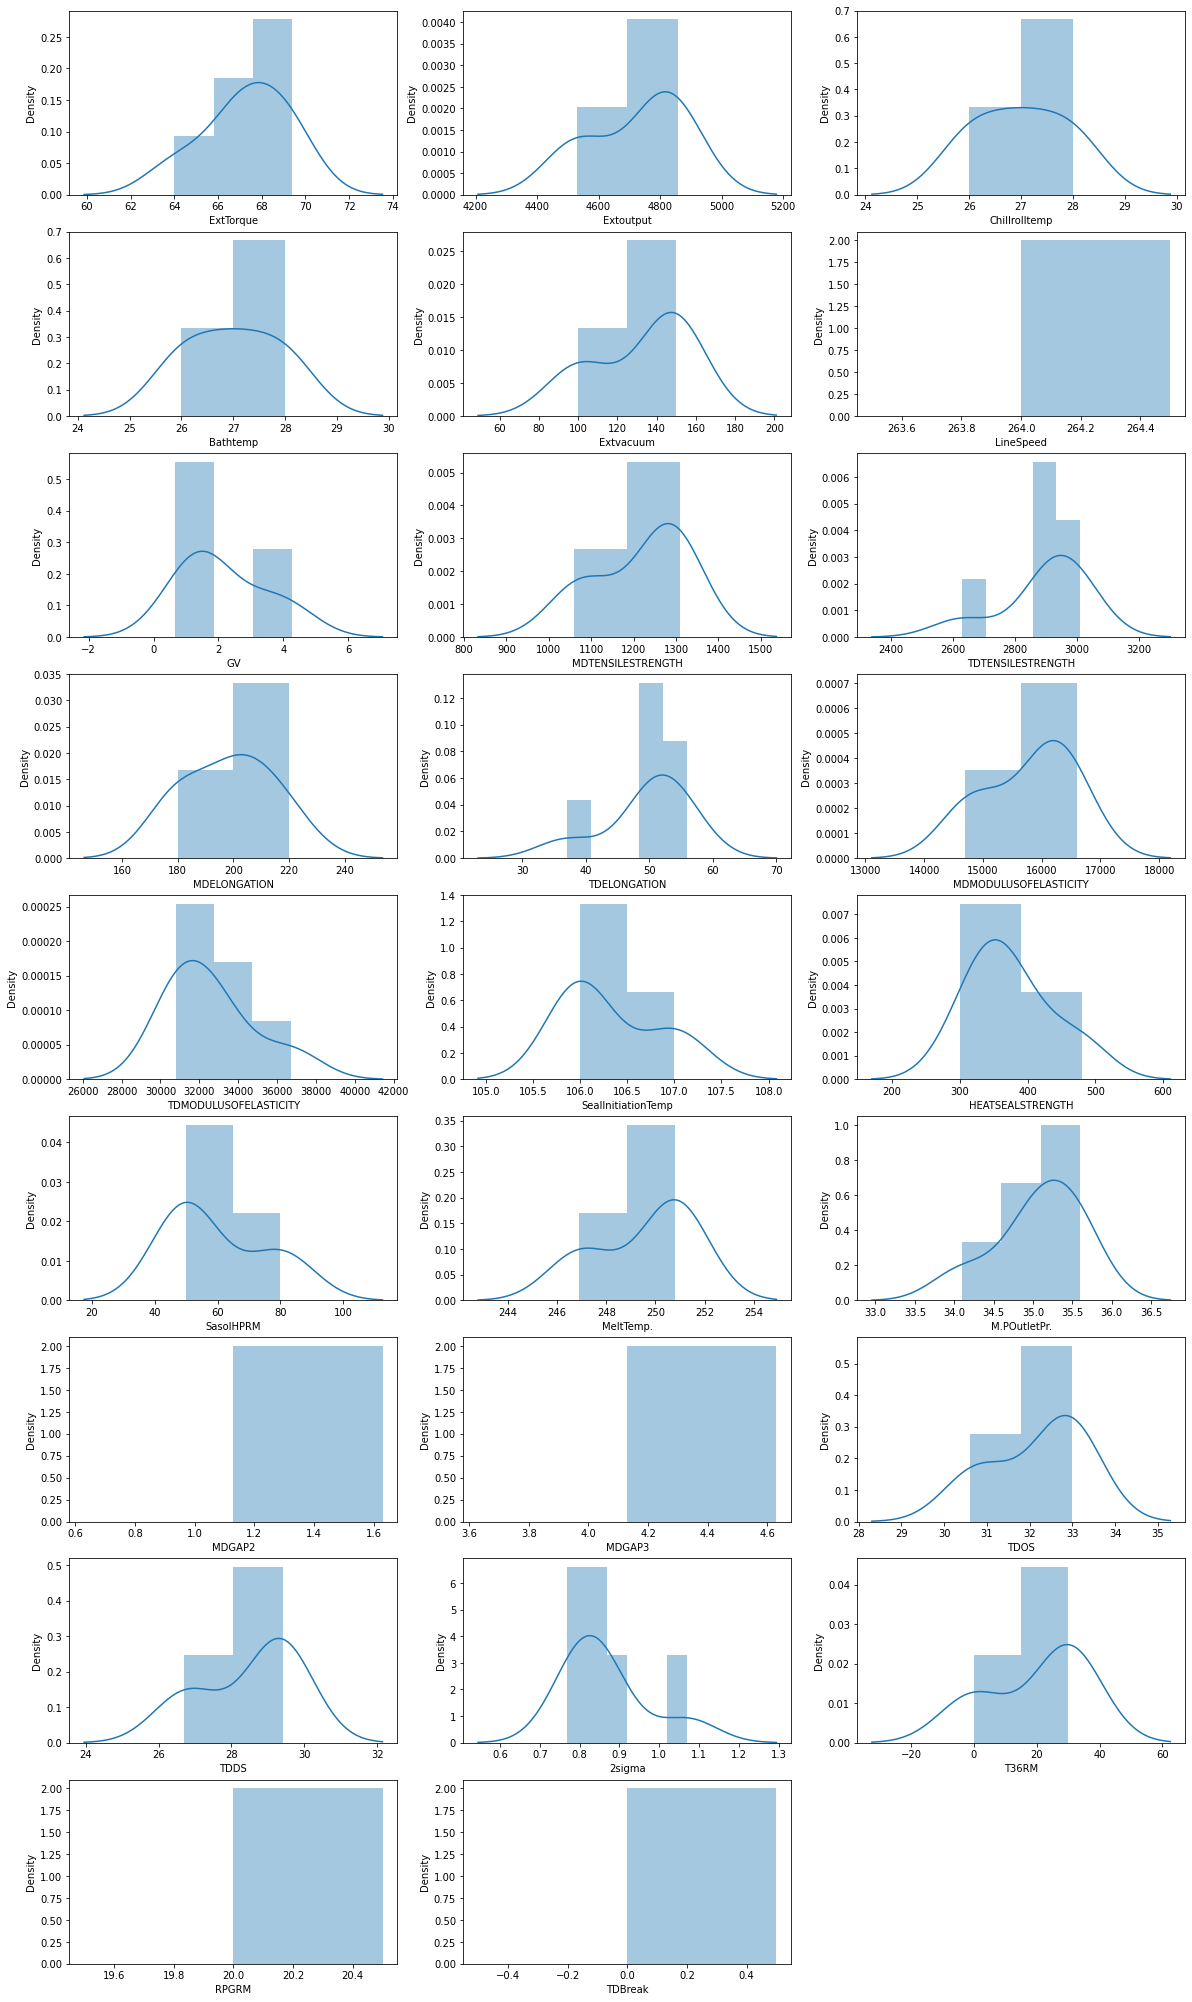

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
i=1
for col in  cols:
    plt.subplot(10,3,i)
    sns.distplot(df1[col])
    i+=1
    
#Data is not normally distributed. Many of the columns has bimodal distribution.

In [29]:
#Is there any null value column
#df.isna().sum()

In [30]:
#enc_prod = pd.DataFrame( pd.get_dummies(df.Product), index=df.index)

In [31]:
#enc_prod.shape

In [32]:
#enc_prod

In [33]:
#df.shape

In [34]:
#df.columns

In [35]:
#df1 = df.merge(enc_prod, how='left',left_index=True, right_index=True)

In [36]:
#df1.drop(columns='Product',inplace=True,axis=0)
#df1.shape

In [37]:
cols_scale = df3.columns
cols_scale = cols.drop('TDBreak')
cols_scale = cols_scale.drop('2sigma')
print(cols_scale)

Index(['ExtTorque', 'Extoutput', 'Chillrolltemp', 'Bathtemp', 'Extvacuum',
       'LineSpeed', 'GV', 'MDTENSILESTRENGTH', 'TDTENSILESTRENGTH',
       'MDELONGATION', 'TDELONGATION', 'MDMODULUSOFELASTICITY',
       'TDMODULUSOFELASTICITY', 'SealInitiationTemp', 'HEATSEALSTRENGTH',
       'SasolHPRM', 'MeltTemp.', 'M.POutletPr.', 'MDGAP2', 'MDGAP3', 'TDOS',
       'TDDS', 'T36RM', 'RPGRM'],
      dtype='object')


In [38]:
#Remove Taget Variable
target = df3[['TDBreak']]

#Scale Variable
scaler = StandardScaler()
scaled = scaler.fit_transform(df3[cols_scale])

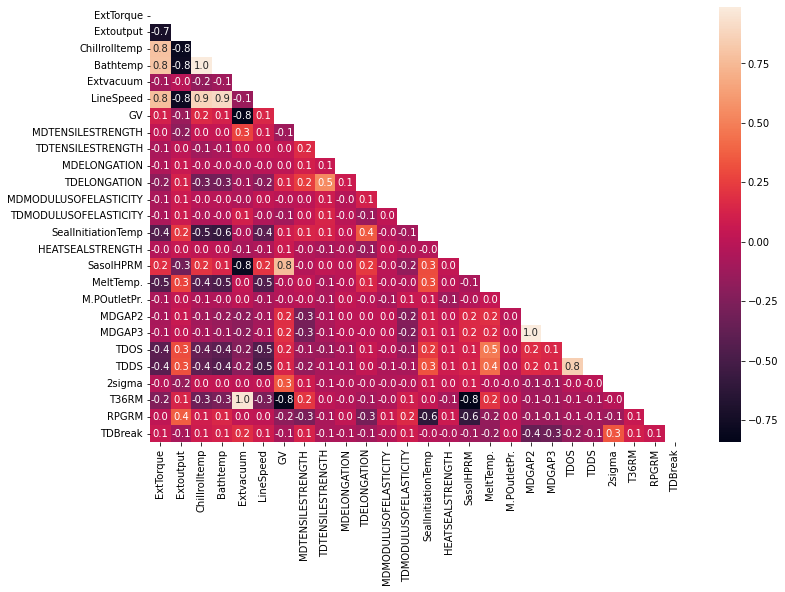

In [39]:
mask = np.triu(np.ones_like(df3.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(12, 8))
hm = sns.heatmap(df3.corr(),mask=mask, annot = True, fmt=".1f")

In [40]:
#Features_TDBreak_Relationship

cor = df3.corr()
cor['TDBreak']

corr_values = pd.DataFrame(cor['TDBreak'])
corr_values =corr_values.reset_index()
corr_values =corr_values.rename(columns={'Index':'Feature','TDBreak':'Corr'})
corr_values['Corr_abs'] = abs(corr_values['Corr'])
corr_values = corr_values.sort_values('Corr_abs', ascending=False)
corr_values.to_csv("Features_TDBreak_Relationship.csv")

corr_values
print(corr_values.head(5))

        index      Corr  Corr_abs
25    TDBreak  1.000000  1.000000
18     MDGAP2 -0.357562  0.357562
22     2sigma  0.341616  0.341616
19     MDGAP3 -0.333102  0.333102
4   Extvacuum  0.183306  0.183306


In [41]:
#Features_2Sigma_Relationship

cor = df3.corr()
cor['2sigma']

corr_values = pd.DataFrame(cor['2sigma'])
corr_values =corr_values.reset_index()
corr_values =corr_values.rename(columns={'Index':'Feature','2sigma':'Corr'})
corr_values['Corr_abs'] = abs(corr_values['Corr'])
corr_values = corr_values.sort_values('Corr_abs', ascending=False)
corr_values.to_csv("Features_2Sigma_Relationship.csv")

corr_values
print(corr_values.head(5))

        index      Corr  Corr_abs
22     2sigma  1.000000  1.000000
6          GV  0.346133  0.346133
25    TDBreak  0.341616  0.341616
1   Extoutput -0.156115  0.156115
24      RPGRM -0.131717  0.131717


In [42]:
#Checking relationship of different variables with between TDBreak and 2Sigma
cor = df3.corr()[['TDBreak','2sigma']]
print(cor.sort_values('TDBreak')['TDBreak'].head(5))
print ('\n')
print(cor.sort_values('TDBreak')['TDBreak'].tail(5))

#MDGAP2, MDGAP3 has negative high relationship with TDBreak
#2sigma, Extvacuum, MDTensileStrength has positive significant relationship with TDBreak

MDGAP2      -0.357562
MDGAP3      -0.333102
MeltTemp.   -0.173726
TDOS        -0.163585
TDDS        -0.117577
Name: TDBreak, dtype: float64


Bathtemp             0.115208
MDTENSILESTRENGTH    0.126067
Extvacuum            0.183306
2sigma               0.341616
TDBreak              1.000000
Name: TDBreak, dtype: float64


In [43]:
print(cor.sort_values('2sigma')['2sigma'].head(5))
print ('\n')
print(cor.sort_values('2sigma')['2sigma'].tail(5))
#Extoutput, RPGRM has negative significant relationship with Quality/2Sigma
#GV, TDBreak has positive significant relationship with Quality/2Sigma

Extoutput           -0.156115
RPGRM               -0.131717
MDGAP2              -0.115853
MDGAP3              -0.113127
TDTENSILESTRENGTH   -0.050712
Name: 2sigma, dtype: float64


MDTENSILESTRENGTH    0.085875
SasolHPRM            0.085952
TDBreak              0.341616
GV                   0.346133
2sigma               1.000000
Name: 2sigma, dtype: float64


# Model Building

In [49]:
!pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [44]:
# As high correlatuon variables with 2sigma and TDBreak are not there in independent variables, linear models may not work for prediction

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from xgboost import XGBClassifier

import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [51]:
X = df3.drop(columns= ['TDBreak'] )
y = df3['TDBreak']

In [52]:
model = RidgeClassifier()
model.fit(X,y)

important_features_ridge = pd.DataFrame( {"Variables" : X.columns, "Coef": model.coef_[0], "Coef_abs": abs(model.coef_[0])}).sort_values("Coef_abs", ascending=False)
important_features_ridge.to_csv('important_features_ridge.csv')
important_features_ridge.head(5)

,Variables,Coef,Coef_abs
22,2sigma,0.762336,0.762336
3,Bathtemp,0.250217,0.250217
2,Chillrolltemp,-0.222834,0.222834
6,GV,-0.119912,0.119912
18,MDGAP2,-0.063748,0.063748


In [53]:
model = Lasso()
model.fit(X,y)

important_features_lasso = pd.DataFrame( {"Variables" : X.columns, "Coef": model.coef_, "Coef_abs": abs(model.coef_)}).sort_values("Coef_abs", ascending=False)
important_features_lasso.to_csv('important_features_lasso.csv')
important_features_lasso.head(5)

,Variables,Coef,Coef_abs
7,MDTENSILESTRENGTH,0.000311,0.000311
4,Extvacuum,0.000297,0.000297
5,LineSpeed,0.000145,0.000145
8,TDTENSILESTRENGTH,-0.000119,0.000119
9,MDELONGATION,-0.000101,0.000101


### Oversampling 

In [54]:
# Oversample using smote.

from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X,y)

In [55]:
model = RidgeClassifier()
model.fit(X_smt,y_smt)

important_features_ridge = pd.DataFrame( {"Variables" : X.columns, "Coef": model.coef_[0], "Coef_abs": abs(model.coef_[0])}).sort_values("Coef_abs", ascending=False)
important_features_ridge.to_csv('important_features_lasso_smote.csv')
important_features_ridge.head(5)

,Variables,Coef,Coef_abs
23,T36RM,-0.875631,0.875631
24,RPGRM,-0.847593,0.847593
15,SasolHPRM,-0.847145,0.847145
22,2sigma,0.711055,0.711055
2,Chillrolltemp,-0.156833,0.156833


In [56]:
model = Lasso()
model.fit(X_smt,y_smt)

important_features_lasso = pd.DataFrame( {"Variables" : X.columns, "Coef": model.coef_, "Coef_abs": abs(model.coef_)}).sort_values("Coef_abs", ascending=False)
important_features_lasso.to_csv('important_features_lasso_smote.csv')
important_features_lasso.head(10)

,Variables,Coef,Coef_abs
4,Extvacuum,0.002034,0.002034
5,LineSpeed,0.000999,0.000999
7,MDTENSILESTRENGTH,0.000755,0.000755
9,MDELONGATION,-0.000504,0.000504
8,TDTENSILESTRENGTH,-0.000239,0.000239
14,HEATSEALSTRENGTH,-0.000134,0.000134
1,Extoutput,-0.000026,0.000026
12,TDMODULUSOFELASTICITY,0.000012,0.000012
11,MDMODULUSOFELASTICITY,-0.000002,0.000002
17,M.POutletPr.,0.000000,0.000000


In [57]:
selected_var = list(important_features_lasso.head(8)['Variables'])
selected_var

['Extvacuum',
 'LineSpeed',
 'MDTENSILESTRENGTH',
 'MDELONGATION',
 'TDTENSILESTRENGTH',
 'HEATSEALSTRENGTH',
 'Extoutput',
 'TDMODULUSOFELASTICITY']

### Model withoutSmote Data

In [61]:
def getScores(estimator, X, y):
    yPred = estimator.predict(X)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=3, average='macro'), 
            recall_score(y, yPred, pos_label=3, average='macro'),
           f1_score(y, yPred, pos_label=3, average='macro'))

def my_scorer(estimator, X, y):
    a, p, r,f1 = getScores(estimator, X, y)
    a,p,r,f1 = round(a,2), round(p,2), round(r,2)  , round(f1,2) 
    print ("Acc:",a, "Precision:",p,"Recall:", r, "F1:", f1)
    #model_score.append(a,p,r)
    return 1

In [62]:
models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(random_state=1), SVC()]
names = ['Logistic Regression',"Naive Bayes", "Decision Tree", "SVM"]
model_score=[]
for model, name in zip(models, names):
    print (name)
    start = time.time()
    cross_val_score(model, X[selected_var], y,scoring=my_scorer, cv=cv)
    print ('time', time.time() - start, '\n\n')

Logistic Regression
Acc: 0.86 Precision: 0.43 Recall: 0.5 F1: 0.46
Acc: 0.86 Precision: 0.43 Recall: 0.5 F1: 0.46
Acc: 0.86 Precision: 0.43 Recall: 0.5 F1: 0.46
Acc: 0.86 Precision: 0.43 Recall: 0.5 F1: 0.46
Acc: 0.9 Precision: 0.95 Recall: 0.67 F1: 0.72
Acc: 0.86 Precision: 0.43 Recall: 0.5 F1: 0.46
Acc: 0.9 Precision: 0.45 Recall: 0.5 F1: 0.48
Acc: 0.9 Precision: 0.45 Recall: 0.5 F1: 0.48
Acc: 0.9 Precision: 0.45 Recall: 0.5 F1: 0.48
Acc: 0.9 Precision: 0.45 Recall: 0.5 F1: 0.48
time 0.4555943012237549 


Naive Bayes
Acc: 0.86 Precision: 0.72 Recall: 0.78 F1: 0.75
Acc: 0.86 Precision: 0.72 Recall: 0.78 F1: 0.74
Acc: 0.62 Precision: 0.5 Recall: 0.5 F1: 0.48
Acc: 0.67 Precision: 0.59 Recall: 0.67 F1: 0.57
Acc: 0.67 Precision: 0.52 Recall: 0.53 F1: 0.51
Acc: 0.57 Precision: 0.49 Recall: 0.47 F1: 0.45
Acc: 0.81 Precision: 0.67 Recall: 0.89 F1: 0.69
Acc: 0.71 Precision: 0.62 Recall: 0.84 F1: 0.61
Acc: 0.67 Precision: 0.54 Recall: 0.59 F1: 0.51
Acc: 0.86 Precision: 0.64 Recall: 0.7 F1: 0.6

In [ ]:
#Recall     : when process fails, 92% identified by the model. 8% even when process fail not identified.
#Precision  : when process fails, 64% identified by the model. 36% even when normal process is said failed process.

### Model with Smote Data

In [63]:
models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(random_state=1), SVC()]
names = ['Logistic Regression',"Naive Bayes", "Decision Tree", "SVM"]

for model, name in zip(models, names):
    print (name)
    start = time.time()
    cross_val_score(model, X_smt[selected_var], y_smt,scoring=my_scorer, cv=cv)
    print ('time', time.time() - start, '\n\n')

Logistic Regression
Acc: 0.74 Precision: 0.76 Recall: 0.74 F1: 0.74
Acc: 0.86 Precision: 0.86 Recall: 0.86 F1: 0.86
Acc: 0.77 Precision: 0.79 Recall: 0.77 F1: 0.77
Acc: 0.6 Precision: 0.6 Recall: 0.6 F1: 0.6
Acc: 0.69 Precision: 0.69 Recall: 0.68 F1: 0.68
Acc: 0.74 Precision: 0.74 Recall: 0.74 F1: 0.74
Acc: 0.77 Precision: 0.79 Recall: 0.77 F1: 0.77
Acc: 0.8 Precision: 0.81 Recall: 0.8 F1: 0.8
Acc: 0.79 Precision: 0.8 Recall: 0.79 F1: 0.79
Acc: 0.76 Precision: 0.76 Recall: 0.76 F1: 0.76
time 0.41670656204223633 


Naive Bayes
Acc: 0.69 Precision: 0.81 Recall: 0.68 F1: 0.64
Acc: 0.69 Precision: 0.75 Recall: 0.68 F1: 0.66
Acc: 0.77 Precision: 0.79 Recall: 0.77 F1: 0.77
Acc: 0.77 Precision: 0.85 Recall: 0.76 F1: 0.76
Acc: 0.77 Precision: 0.81 Recall: 0.78 F1: 0.77
Acc: 0.8 Precision: 0.85 Recall: 0.81 F1: 0.79
Acc: 0.71 Precision: 0.81 Recall: 0.72 F1: 0.69
Acc: 0.69 Precision: 0.75 Recall: 0.69 F1: 0.67
Acc: 0.82 Precision: 0.87 Recall: 0.82 F1: 0.82
Acc: 0.71 Precision: 0.81 Recall: 0.7

In [64]:
#Train Test split to Develop final model
X_test,  X_train, y_test, y_train = train_test_split(X_smt[selected_var],y_smt,test_size=.8, stratify=y_smt, random_state=1)

In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((279, 8), (279,), (69, 8), (69,))

In [66]:
def get_metrics(y, y_pred):
    acc = round(accuracy_score(y, y_pred),2)
    recall = round(recall_score(y, y_pred),2)
    precision = round(precision_score(y, y_pred),2)
    f1 = round(f1_score(y,y_pred),2)
    roc = round(roc_auc_score(y,y_pred),2)
    print ("Accuracy :", acc, "Recall", recall, "Precision:",precision, "F1 Score:",f1, "ROC:", roc)
    
    
def create_model(model):
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print ("On Train Data")
    get_metrics(y_train,y_train_pred)
    print ("On Test Data")
    get_metrics(y_test,y_test_pred)
    return model

In [67]:
from sklearn.inspection import permutation_importance

In [68]:
model = DecisionTreeClassifier()
model = create_model(model)

On Train Data
Accuracy : 1.0 Recall 1.0 Precision: 1.0 F1 Score: 1.0 ROC: 1.0
On Test Data
Accuracy : 0.8 Recall 0.88 Precision: 0.75 F1 Score: 0.81 ROC: 0.8


In [69]:
features = pd.DataFrame( {"Feature":X_smt[selected_var].columns, "Important":model.feature_importances_})
features
#features.sort_values("Important", ascending=False).head(5)

,Feature,Important
0,Extvacuum,0.270193
1,LineSpeed,0.105880
2,MDTENSILESTRENGTH,0.054893
3,MDELONGATION,0.245805
4,TDTENSILESTRENGTH,0.086375
5,HEATSEALSTRENGTH,0.123500
6,Extoutput,0.083143
7,TDMODULUSOFELASTICITY,0.030210


In [70]:
model = XGBClassifier(objective='binary:logistic')
model = create_model(model)

[19:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
On Train Data
Accuracy : 1.0 Recall 1.0 Precision: 1.0 F1 Score: 1.0 ROC: 1.0
On Test Data
Accuracy : 0.91 Recall 0.97 Precision: 0.87 F1 Score: 0.92 ROC: 0.91


In [71]:
features = pd.DataFrame( {"Feature":X_smt[selected_var].columns, "Important":model.feature_importances_})
features.sort_values("Important", ascending=False).head(5)

,Feature,Important
3,MDELONGATION,0.209778
0,Extvacuum,0.206307
1,LineSpeed,0.180597
2,MDTENSILESTRENGTH,0.128019
6,Extoutput,0.124769


### regression models for 2sigma

In [ ]:
# creating dependent variable 2sigma and others as independent variables

x2 = df3.drop(columns= ['2sigma'] )
y2 = df3['2sigma']

In [ ]:
# splitting data into train and test

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=1, test_size=0.3)

In [ ]:
# importing regression algorithms modules

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

reg_models = {'linear_regression' : LinearRegression(), 'Decision_tree' : DecisionTreeRegressor(random_state=1), 'Random_forest' : RandomForestRegressor(random_state=1)}

r2_dict = {'model':[], 'r2':[], 'mae':[], 'rmse':[]}

In [ ]:
# creating regression algorithms

for i in reg_models:
    reg_model = reg_models[i]
    reg_model.fit(x2_train, y2_train)
    y2_pred = reg_model.predict(x2_test)
    r2 = r2_score(y2_test, y2_pred)
    r2 = round(r2, 2)
    mae = mean_absolute_error(y2_test, y2_pred)
    mae = round(mae,2)
    rmse = (mean_squared_error(y2_test, y2_pred))**0.5
    rmse = round(rmse,2)
    r2_dict['model'].append(i)
    r2_dict['r2'].append(r2)
    r2_dict['mae'].append(mae)
    r2_dict['rmse'].append(rmse)

In [ ]:
# comparing r2 score and mean abs error and root mean squurared error for the models

pd.DataFrame(r2_dict)

In [ ]:
pd.DataFrame(r2_dict).set_index('model').plot(marker='o', figsize=(10,5))

#### Random forest regressor is the best out of 3 models

In [ ]:
# finding top 5 features impacting 2sigma using RFE with Random Forest Regressor

rfe_2sigma = RFE(estimator=RandomForestRegressor(random_state=1), n_features_to_select=5).fit(x2_train, y2_train)

In [ ]:
# deriving important column names using rfe_2sigma

from itertools import compress
imp_columns_2sigma = list(compress(x2, list(rfe_2sigma.support_)))
imp_columns_2sigma

# pyCaret

In [75]:
y_smt.shape, X_smt.shape

((348,), (348, 25))

In [76]:
df4 = X_smt.copy()
df4['TDBreak'] = y_smt

In [77]:
df4.head(5)

,ExtTorque,Extoutput,Chillrolltemp,Bathtemp,Extvacuum,LineSpeed,GV,MDTENSILESTRENGTH,TDTENSILESTRENGTH,MDELONGATION,TDELONGATION,MDMODULUSOFELASTICITY,TDMODULUSOFELASTICITY,SealInitiationTemp,HEATSEALSTRENGTH,SasolHPRM,MeltTemp.,M.POutletPr.,MDGAP2,MDGAP3,TDOS,TDDS,2sigma,T36RM,RPGRM,TDBreak
0,65.4,4371,28,28,150,240,1.92,1200,2690,170,29,17400,37000,107,356,50,249.7,35.3,1.13,4.13,35.0,31.3,2.302,30,20,1
1,72.2,4580,28,28,149,240,0.75,1420,1150,170,44,17300,27000,107,320,50,250.8,35.2,1.13,4.13,33.0,29.2,1.307,30,20,1
2,69.3,4594,28,28,145,248,1.79,1280,2950,220,50,13000,30700,106,366,50,249.7,36.6,1.13,4.13,32.3,28.2,1.310,30,20,0
3,68.7,4446,28,28,148,259,1.92,1310,2810,200,46,11800,30400,106,335,50,250.8,36.1,1.13,4.13,32.7,28.0,1.038,30,20,0
4,67.5,4626,28,28,150,264,1.70,1290,3060,230,58,13700,33300,106,354,50,250.8,34.7,1.13,4.13,33.2,28.9,0.917,30,20,0


In [78]:
data = df4.sample(frac=0.70, random_state=786)
data_unseen = df4.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (244, 26)
Unseen Data For Predictions: (104, 26)


In [80]:
from pycaret.classification import *

In [82]:
exp_clf101 = setup(data = data, target = 'TDBreak', session_id=123)

,Description,Value
0,session_id,123
1,Target,TDBreak
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(244, 26)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [83]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8941,0.9681,0.9278,0.8697,0.8935,0.7883,0.7972,0.0590
lightgbm,Light Gradient Boosting Machine,0.8941,0.9667,0.9278,0.8722,0.8966,0.7890,0.7948,0.0500
ada,Ada Boost Classifier,0.8882,0.9639,0.9278,0.8791,0.8948,0.7775,0.7922,0.0650
xgboost,Extreme Gradient Boosting,0.8882,0.9597,0.9278,0.8653,0.8916,0.7766,0.7852,0.1250
rf,Random Forest Classifier,0.8824,0.9708,0.8931,0.8761,0.8756,0.7658,0.7792,0.1670
et,Extra Trees Classifier,0.8824,0.9500,0.8667,0.8949,0.8758,0.7642,0.7717,0.1270
ridge,Ridge Classifier,0.8765,0.0000,0.8444,0.8956,0.8663,0.7520,0.7575,0.0130
lda,Linear Discriminant Analysis,0.8588,0.9319,0.8444,0.8671,0.8519,0.7175,0.7238,0.0160
dt,Decision Tree Classifier,0.8000,0.8056,0.8583,0.7726,0.8011,0.6047,0.6255,0.0100
qda,Quadratic Discriminant Analysis,0.7824,0.7785,0.8153,0.7956,0.7936,0.5604,0.5735,0.0230


In [84]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [105]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [106]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,0.9722,1.0000,0.8889,0.9412,0.8828,0.8889
1,0.8235,0.9444,0.8750,0.7778,0.8235,0.6483,0.6528
2,0.9412,0.9722,1.0000,0.8889,0.9412,0.8828,0.8889
3,0.8824,0.9861,0.8750,0.8750,0.8750,0.7639,0.7639
4,0.8824,0.9583,0.7500,1.0000,0.8571,0.7606,0.7833
5,0.9412,1.0000,1.0000,0.8889,0.9412,0.8828,0.8889
6,0.8824,0.9861,1.0000,0.8000,0.8889,0.7671,0.7888
7,0.8824,0.9583,1.0000,0.8000,0.8889,0.7671,0.7888
8,0.7647,0.9028,0.7778,0.7778,0.7778,0.5278,0.5278
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [107]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7059,0.8056,0.8750,0.6364,0.7368,0.4218,0.4497
1,0.7059,0.7986,0.6250,0.7143,0.6667,0.4056,0.4085
2,0.6471,0.9097,0.8750,0.5833,0.7000,0.3108,0.3499
3,0.5294,0.6875,0.7500,0.5000,0.6000,0.0811,0.0913
4,0.6471,0.8472,0.7500,0.6000,0.6667,0.3014,0.3099
5,0.8824,0.9306,0.7500,1.0000,0.8571,0.7606,0.7833
6,0.7647,0.9028,0.8750,0.7000,0.7778,0.5342,0.5494
7,0.7647,0.8542,0.5000,1.0000,0.6667,0.5143,0.5883
8,0.5882,0.6042,0.6667,0.6000,0.6316,0.1678,0.1690
9,0.7059,0.7014,0.6667,0.7500,0.7059,0.4138,0.4167


In [108]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [109]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,1.0000,1.0000,0.8889,0.9412,0.8828,0.8889
1,0.7059,0.9167,0.7500,0.6667,0.7059,0.4138,0.4167
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9412,1.0000,0.8750,1.0000,0.9333,0.8811,0.8874
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9412,1.0000,1.0000,0.8889,0.9412,0.8828,0.8889
6,0.7647,0.9583,0.8750,0.7000,0.7778,0.5342,0.5494
7,0.8824,0.9444,1.0000,0.8000,0.8889,0.7671,0.7888
8,0.7647,0.8472,0.7778,0.7778,0.7778,0.5278,0.5278
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Tune Model

In [110]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7647,0.9028,0.8750,0.7000,0.7778,0.5342,0.5494
2,0.8824,0.9861,0.8750,0.8750,0.8750,0.7639,0.7639
3,0.8824,0.9722,0.8750,0.8750,0.8750,0.7639,0.7639
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9412,0.9722,1.0000,0.8889,0.9412,0.8828,0.8889
6,0.8824,0.9861,1.0000,0.8000,0.8889,0.7671,0.7888
7,0.9412,1.0000,1.0000,0.8889,0.9412,0.8828,0.8889
8,0.8235,0.8611,0.7778,0.8750,0.8235,0.6483,0.6528
9,0.9412,0.9722,0.8889,1.0000,0.9412,0.8828,0.8889


In [111]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)


In [112]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7647,0.8056,0.7500,0.7500,0.7500,0.5278,0.5278
1,0.7059,0.7639,0.6250,0.7143,0.6667,0.4056,0.4085
2,0.8824,0.9167,0.8750,0.8750,0.8750,0.7639,0.7639
3,0.7647,0.8056,0.7500,0.7500,0.7500,0.5278,0.5278
4,0.8235,0.8681,0.8750,0.7778,0.8235,0.6483,0.6528
5,0.9412,0.9444,1.0000,0.8889,0.9412,0.8828,0.8889
6,0.9412,0.9444,1.0000,0.8889,0.9412,0.8828,0.8889
7,0.8824,0.8611,0.7500,1.0000,0.8571,0.7606,0.7833
8,0.6471,0.6181,0.6667,0.6667,0.6667,0.2917,0.2917
9,0.7059,0.7500,0.6667,0.7500,0.7059,0.4138,0.4167


In [ ]:
print(tuned_knn)

# AUC Plot

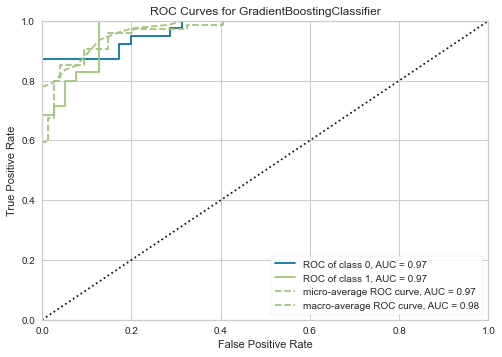

In [100]:
plot_model(tuned_gbc, plot = 'auc')

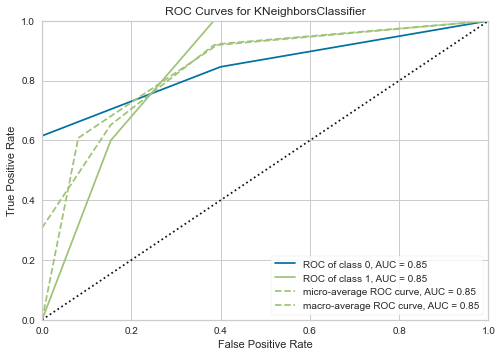

In [114]:
plot_model(tuned_knn, plot = 'auc')

# Precision Recall

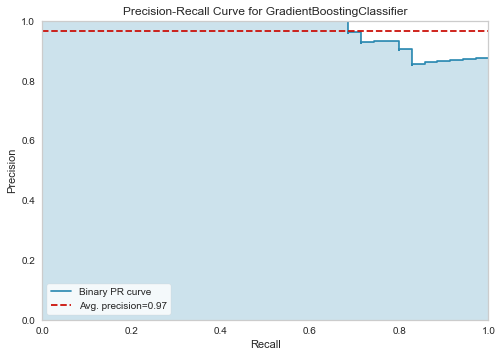

In [102]:
plot_model(tuned_gbc, plot = 'pr')

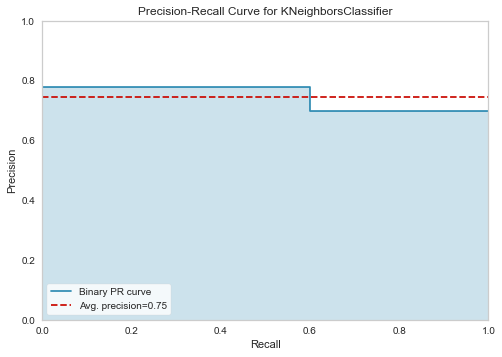

In [103]:
plot_model(tuned_knn, plot = 'pr')

# Feature Importance

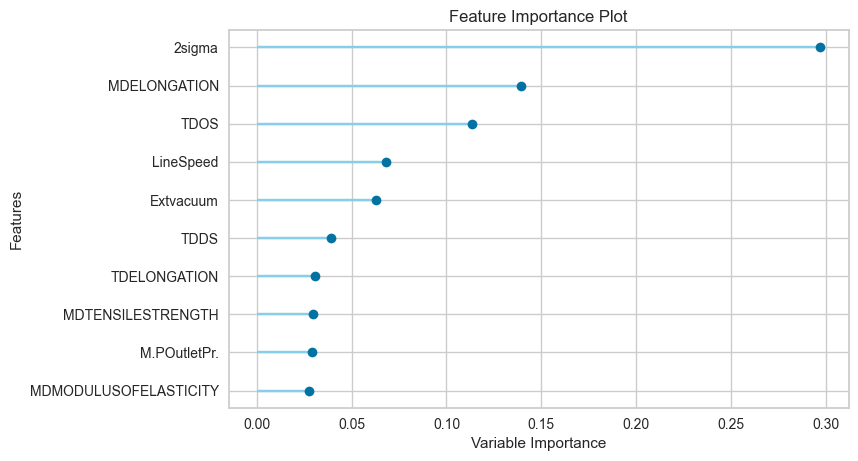

In [115]:
plot_model(tuned_gbc, plot='feature')


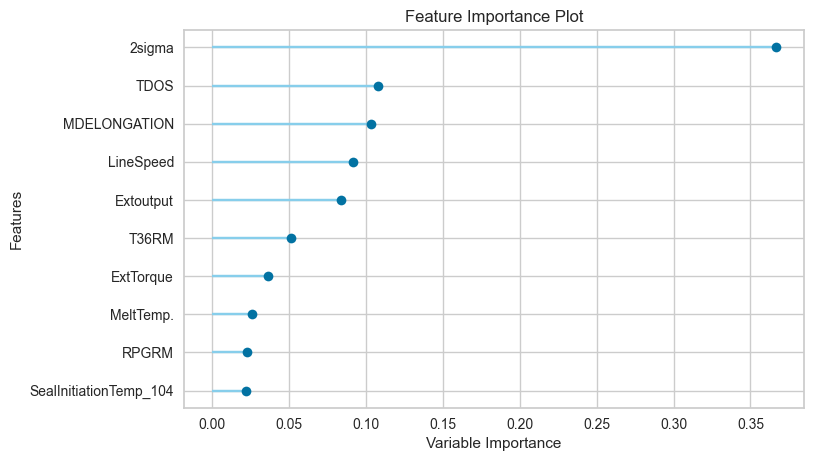

In [116]:
plot_model(gbc, plot='feature')

# Confusion Matrix

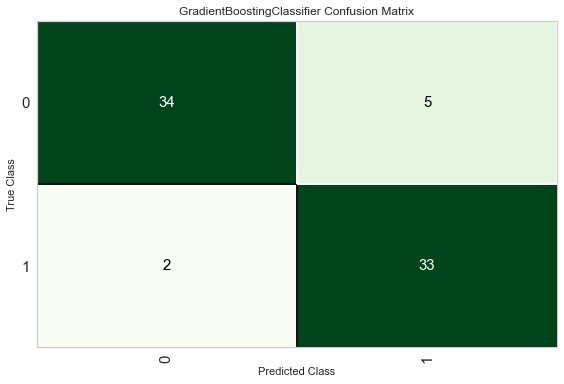

In [119]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [120]:
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9054,0.9707,0.9429,0.8684,0.9041,0.8111,0.8138


# Create Final Model

In [122]:
final_gbc = finalize_model(tuned_gbc)

In [123]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,ExtTorque,Extoutput,Chillrolltemp,Bathtemp,Extvacuum,LineSpeed,GV,MDTENSILESTRENGTH,TDTENSILESTRENGTH,MDELONGATION,...,MDGAP2,MDGAP3,TDOS,TDDS,2sigma,T36RM,RPGRM,TDBreak,Label,Score
0,69.3,4594,28,28,145,248,1.79,1280,2950,220,...,1.13,4.13,32.3,28.2,1.310,30,20,0,0,0.6779
1,68.7,4446,28,28,148,259,1.92,1310,2810,200,...,1.13,4.13,32.7,28.0,1.038,30,20,0,0,0.9549
2,67.6,4746,28,28,149,264,1.79,1270,2760,220,...,1.13,4.13,32.6,28.7,0.798,30,20,0,0,0.9994
3,66.8,4781,28,28,148,264,1.54,1240,2960,210,...,1.13,4.13,31.8,28.1,0.816,30,20,0,0,0.9996
4,65.7,4531,26,26,149,264,0.80,1100,3020,160,...,1.13,4.13,33.6,29.7,1.268,35,0,1,1,0.9474


In [125]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['TDBreak'], unseen_predictions['Label'], metric = 'Accuracy')

0.9231

# Save Model 

In [126]:
save_model(final_gbc,'Final GBC Model 27Sep21')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='TDBreak',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                             learning_rate=0.3, loss='deviance',
                                             max_depth=5, max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_im

# Load Saved Model

In [127]:
saved_final_gbc = load_model('Final GBC Model 27Sep21')

Transformation Pipeline and Model Successfully Loaded


In [129]:
new_prediction = predict_model(saved_final_gbc, data=data_unseen)

In [130]:
new_prediction.head()

,ExtTorque,Extoutput,Chillrolltemp,Bathtemp,Extvacuum,LineSpeed,GV,MDTENSILESTRENGTH,TDTENSILESTRENGTH,MDELONGATION,...,MDGAP2,MDGAP3,TDOS,TDDS,2sigma,T36RM,RPGRM,TDBreak,Label,Score
0,69.3,4594,28,28,145,248,1.79,1280,2950,220,...,1.13,4.13,32.3,28.2,1.310,30,20,0,0,0.6779
1,68.7,4446,28,28,148,259,1.92,1310,2810,200,...,1.13,4.13,32.7,28.0,1.038,30,20,0,0,0.9549
2,67.6,4746,28,28,149,264,1.79,1270,2760,220,...,1.13,4.13,32.6,28.7,0.798,30,20,0,0,0.9994
3,66.8,4781,28,28,148,264,1.54,1240,2960,210,...,1.13,4.13,31.8,28.1,0.816,30,20,0,0,0.9996
4,65.7,4531,26,26,149,264,0.80,1100,3020,160,...,1.13,4.13,33.6,29.7,1.268,35,0,1,1,0.9474


In [131]:
from pycaret.utils import check_metric
check_metric(new_prediction['TDBreak'], new_prediction['Label'], metric = 'Accuracy')

0.9231